In [33]:
# Import necessary libraries
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler

In [34]:
file_path = './professors_data.csv'
#file_path = './filtered_professors.csv'
school_data = pd.read_csv(file_path)

In [ ]:
selected_schools = [
    "Columbia University",
    "Cornell University",
    "New York University",
    "University of Rochester",
    "University at Buffalo (SUNY Buffalo)",
    "Stony Brook University (SUNY)",
    "Rensselaer Polytechnic Institute",
    "University at Albany (SUNY Albany)",
    "Binghamton University (SUNY)",
    "Rochester Institute of Technology",
    "Fordham University - Rose Hill",
    "Fordham University at Lincoln Center",
    "St. John's University - Jamaica/Queens",
    "Syracuse University",
    "The New School",
    "Vassar College",
    "Hofstra University",
    "Pace University (all)",
    "Hamilton College",
    "Bard College",
    "Colgate University",
    "Marist College",
    "Sarah Lawrence College",
    "Ithaca College",
    "Union College",
    "Hobart and William Smith Colleges",
    "Yeshiva University",
    "Skidmore College",
    "Purchase College (SUNY Purchase)",
    "Adelphi University",
    "Clarkson University",
    "St. Lawrence University",
    "Long Island University - Post",
    "Touro College",
    "United States Military Academy",
    "SUNY College of Environmental Science and Forestry",
    "Lehman College",
    "Hartwick College"
]

print(len(set(selected_schools)))

38


In [34]:
from collections import Counter

# Count occurrences of each school in the list
school_counts = Counter(selected_schools)

# Find duplicates (schools with a count greater than 1)
duplicates = [school for school, count in school_counts.items() if count > 1]

# Display duplicates
print("Duplicate schools in the list:")
print(duplicates)

Duplicate schools in the list:
[]


In [35]:
filtered_data = school_data[school_data['institution_name'].isin(selected_schools)]

In [36]:
unique_institutions = filtered_data['institution_name'].unique()
# Convert to a list (optional, if you want a list format)
unique_institutions_list = unique_institutions.tolist()

# Display the unique institution names
print(len(unique_institutions_list))

38


In [37]:
# Find schools in the list but not in the unique institutions
missing_schools = list(set(selected_schools) - set(unique_institutions_list))

# Display the missing schools
print("Schools in the list but not in the data:")
print(missing_schools)

Schools in the list but not in the data:
[]


In [38]:
filtered_data.head()

,tDept,tSid,institution_name,tFname,tMiddlename,tLname,tid,tNumRatings,rating_class,contentType,categoryType,overall_rating
0,Mathematics,NaN,University at Buffalo (SUNY Buffalo),Robert,NaN,Busch,VGVhY2hlci05MjI3OQ==,431,NaN,TEACHER,PROFESSOR,4.4
1,Engineering,NaN,University at Buffalo (SUNY Buffalo),Shahid,NaN,Ahmad,VGVhY2hlci0xNzM0OA==,424,NaN,TEACHER,PROFESSOR,3.7
2,Biology,NaN,University at Buffalo (SUNY Buffalo),Todd,NaN,Hennessey,VGVhY2hlci0xNjkxMTA=,215,NaN,TEACHER,PROFESSOR,3.5
3,Chemistry,NaN,University at Buffalo (SUNY Buffalo),Stacey,NaN,Gulde,VGVhY2hlci0xNzQ0ODc0,211,NaN,TEACHER,PROFESSOR,4.1
4,Computer Science,NaN,University at Buffalo (SUNY Buffalo),Jesse,NaN,Hartloff,VGVhY2hlci0yMDU1NDE3,184,NaN,TEACHER,PROFESSOR,3.2


In [41]:
filtered_data.shape

(11114, 12)

In [44]:
print(filtered_data.shape)
filtered_data = filtered_data.drop_duplicates(subset='tid', keep='first')
# Display the updated dataframe
print(filtered_data.shape)
print("Dataframe after removing redundant rows:")
print(filtered_data.shape)

(3957, 12)
(3957, 12)
Dataframe after removing redundant rows:
(3957, 12)


In [ ]:
stony_professors = filtered_data[filtered_data['institution_name']=='University at Buffalo (SUNY Buffalo)']
stony_professors.shape

(100, 12)

In [19]:
# List of columns to lowercase
columns_to_lowercase = ['tDept', 'institution_name', 'tFname', 'tMiddlename', 'tLname', 'contentType', 'categoryType']

# Loop through the specified columns and apply lowercase
for col in columns_to_lowercase:
    if col in school_data.columns:
        # Convert the column to string and then apply .str.lower()
        school_data[col] = school_data[col].astype(str).str.lower()


# Display the updated dataframe
print("Dataframe with specified columns in lowercase:")
print(school_data)


Dataframe with specified columns in lowercase:
              tDept              tSid     institution_name   tFname  \
0      architecture  U2Nob29sLTI3OA==  columbia university      ted   
1       mathematics  U2Nob29sLTI3OA==  columbia university  alberto   
2         economics  U2Nob29sLTI3OA==  columbia university   andrea   
3               law  U2Nob29sLTI3OA==  columbia university  florina   
4           biology  U2Nob29sLTI3OA==  columbia university  deborah   
...             ...               ...                  ...      ...   
51827       biology  U2Nob29sLTM5OA==     hartwick college    munir   
51828         music  U2Nob29sLTM5OA==     hartwick college     paul   
51829       science  U2Nob29sLTM5OA==     hartwick college   pamela   
51830       nursing  U2Nob29sLTM5OA==     hartwick college    linda   
51831         music  U2Nob29sLTM5OA==     hartwick college   daniel   

      tMiddlename      tLname                   tid  tNumRatings  \
0             nan       mosby  V

In [20]:
school_data.shape

(51832, 12)

In [21]:
# Group by institution_name and tDept, then compute the average overall_rating
agg_ratings = school_data.groupby(['institution_name', 'tDept']).agg(
    avg_overall_rating=('overall_rating', 'mean'),
    total_num_ratings=('tNumRatings', 'sum')
).reset_index()


# Rename the column for clarity
agg_ratings.rename(columns={'overall_rating': 'avg_overall_rating', 'tNumRatings':'total_ratings'}, inplace=True)

# Display the result
agg_ratings.head(10)

,institution_name,tDept,avg_overall_rating,total_num_ratings
0,adelphi university,accounting,3.404545,295
1,adelphi university,anthropology,3.400000,258
2,adelphi university,art education,2.033333,8
3,adelphi university,art history,3.427778,167
4,adelphi university,biological sciences,4.900000,58
5,adelphi university,biology,3.486747,1779
6,adelphi university,business,3.271667,705
7,adelphi university,chemistry,2.894340,1124
8,adelphi university,classics,2.300000,17
9,adelphi university,communication,3.421429,720


In [23]:
# Filter the dataframe for tDept 'Accounting'
accounting_ratings = agg_ratings[agg_ratings['tDept'] == 'Accounting']

accounting_ratings = accounting_ratings[accounting_ratings['total_num_ratings']>10]

# Sort by avg_overall_rating in descending order and get the top 5
top_5_schools = accounting_ratings.sort_values(by='avg_overall_rating', ascending=False).head(10)

# Display the result
print(top_5_schools)

Empty DataFrame
Columns: [institution_name, tDept, avg_overall_rating, total_num_ratings]
Index: []


In [ ]:
school_avg_ratings = school_data.groupby(['institution_name']).agg(
    avg_overall_rating=('overall_rating', 'mean'),
    total_num_ratings=('tNumRatings', 'sum')
).reset_index()

# Rename the column for clarity
school_avg_ratings.rename(columns={'overall_rating': 'avg_overall_rating', 'tNumRatings':'total_num_ratings'}, inplace=True)

# Display the result
school_avg_ratings.head(10)

,institution_name,avg_overall_rating,total_num_ratings
0,adelphi university,3.381273,17699
1,bard college,3.589149,3972
2,binghamton university (suny),3.407914,50726
3,clarkson university,3.116760,2923
4,colgate university,3.575513,8097
5,columbia university,2.396778,4184
6,cornell university,3.330767,28545
7,fordham university - rose hill,3.512931,30878
8,fordham university at lincoln center,3.301310,10461
9,hamilton college,3.645361,2848


In [25]:
top_10_schools = school_avg_ratings.sort_values(by='avg_overall_rating', ascending=False).head(10)
print(top_10_schools)

                          institution_name  avg_overall_rating  \
36                          vassar college            3.718323   
9                         hamilton college            3.645361   
1                             bard college            3.589149   
4                       colgate university            3.575513   
23                        skidmore college            3.561945   
11       hobart and william smith colleges            3.536050   
7           fordham university - rose hill            3.512931   
24  st. john's university - jamaica/queens            3.511677   
31                           union college            3.423507   
22                  sarah lawrence college            3.421561   

    total_num_ratings  
36               7524  
9                2848  
1                3972  
4                8097  
23               5187  
11               2790  
7               30878  
24              58787  
31              15161  
22               2005  


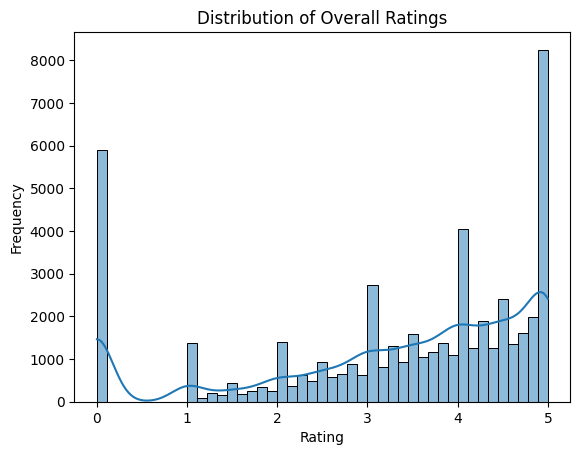

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of overall ratings
sns.histplot(school_data['overall_rating'], kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


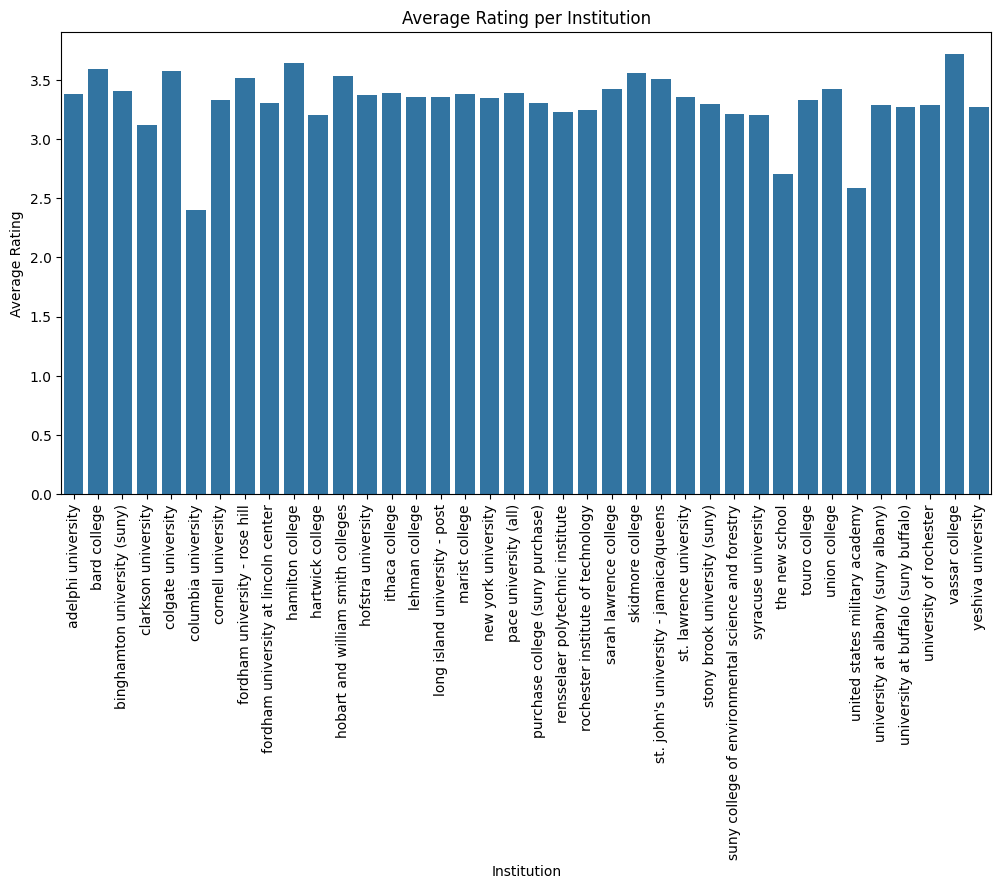

In [27]:
avg_rating_per_institution = school_data.groupby('institution_name')['overall_rating'].mean().reset_index()

# Plot average rating per institution
plt.figure(figsize=(12, 6))
sns.barplot(x='institution_name', y='overall_rating', data=avg_rating_per_institution)
plt.xticks(rotation=90)
plt.title('Average Rating per Institution')
plt.xlabel('Institution')
plt.ylabel('Average Rating')
plt.show()


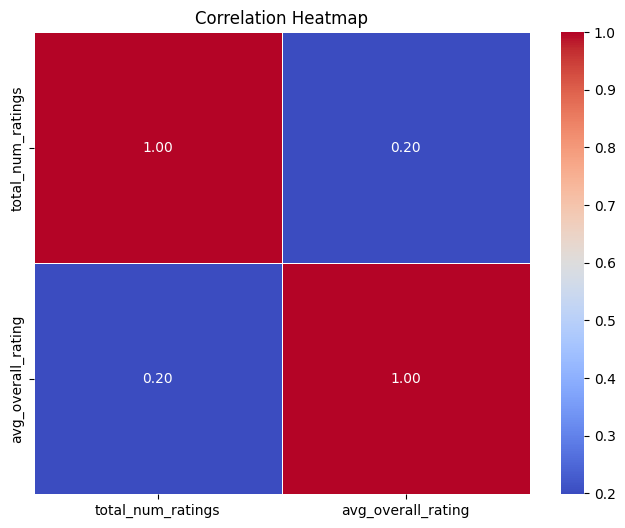

In [ ]:
# Correlation heatmap for numeric features
scaler = StandardScaler()

numeric_features = ['total_num_ratings', 'avg_overall_rating']
correlation_matrix = school_avg_ratings[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Number of Ratings vs. Average Rating by Department and Institution --  Explore if more ratings correlate with higher or lower average ratings in departments across institutions.
# Calculate total ratings and average ratings per department and institution
ratings_and_avg = school_data.groupby(['institution_name', 'tDept'])[['tNumRatings', 'overall_rating']].agg({'tNumRatings':'sum', 'overall_rating':'mean'}).reset_index()

# Plot the scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='tNumRatings', y='overall_rating', hue='tDept', data=ratings_and_avg)
plt.title('Number of Ratings vs. Average Rating by Department and Institution')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
#Comparison of Rating Distribution Across Departments -- Understand how ratings vary across departments within schools.

# Plot violin plot to compare the distribution of ratings across departments
plt.figure(figsize=(14, 8))
sns.violinplot(x='tDept', y='overall_rating', data=school_data)
plt.xticks(rotation=90)
plt.title('Comparison of Rating Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Overall Rating')
plt.show()


In [ ]:
# # Initialize VADER SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()

# # Apply VADER to get the sentiment score for each text entry
# df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# # Determine the sentiment label based on the compound score
# df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# # Display the result
# print(df)

In [ ]:
#Create a graph showing correlation between normalized sentiment score and the rating score


###################
         #
###################
         #
###################

In [ ]:
# Step 1: Normalize each factor using StandardScaler
scaler = StandardScaler()

# Normalize sentiment score (range from -1 to 1)
df['normalized_sentiment'] = scaler.fit_transform(df[['sentiment_score']])  # Sentiment will be scaled with mean 0, std dev 1

# Normalize avg_overall_rating (range from 0 to 5)
df['normalized_avg_rating'] = scaler.fit_transform(df[['avg_overall_rating']])

# Step 2: Assign weights for each factor (you can adjust these based on your preference)
w_sentiment = 0.5  # Weight for sentiment
w_avg_rating = 0.5  # Weight for average rating

# Step 3: Compute the composite ranking metric
df['ranking_metric'] = (w_sentiment * df['normalized_sentiment'] +
                        w_avg_rating * df['normalized_avg_rating'])

# Step 4: Sort the schools based on the ranking metric in descending order (higher is better)
df_sorted = df.sort_values(by='ranking_metric', ascending=False)

# Display the sorted dataframe
print(df_sorted[['institution_name', 'ranking_metric']])